In [3]:
import pandas as pd

# 파일 경로를 지정
file_path = r'C:\Users\TAEKWONLEE\Downloads\auto-mpg.csv'  # r을 붙이면 경로 슬래시(\)가 오류 없이 처리됨

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# 데이터 미리보기
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [10]:
import pandas as pd

# 1. 
# 데이터 불러오기
file_path = r'C:\Users\TAEKWONLEE\Downloads\auto-mpg.csv'
df = pd.read_csv(file_path)

# 'horsepower' 컬럼을 숫자형으로 변환, 결측치 NaN으로 처리
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# 결측치 개수 확인 및 중앙값 계산
print('결측치 개수:', df['horsepower'].isnull().sum())
median_hp = df['horsepower'].median()

# 결측치 중앙값으로 대체 (수정된 부분)
df['horsepower'] = df['horsepower'].fillna(median_hp)
print('결측치 처리 후:', df['horsepower'].isnull().sum())

# 2. 'car name' 컬럼 정확히 지정해서 제거 후 새 DataFrame 생성
df2 = df.drop('car name', axis=1).copy()

# 결과 확인
print(df2.columns)
print(df2.head())

결측치 개수: 6
결측치 처리 후: 0
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  


In [11]:
import pandas as pd

# 1. 데이터 불러오기 및 전처리 (이전 미션 코드)
file_path = r'C:\Users\TAEKWONLEE\Downloads\auto-mpg.csv'
df = pd.read_csv(file_path)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
median_hp = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(median_hp)
df2 = df.drop('car name', axis=1).copy()

# 2. 연비 30 이상 필터링
high_mpg = df2[df2['mpg'] >= 30].copy()

# 3. 무게 대비 마력 비율 컬럼 추가
high_mpg['hp_weight_ratio'] = high_mpg['horsepower'] / high_mpg['weight']

# 결과 확인
print(high_mpg[['mpg', 'horsepower', 'weight', 'hp_weight_ratio']].head())
print('조건 만족 차량 수:', len(high_mpg))


      mpg  horsepower  weight  hp_weight_ratio
51   30.0        70.0    2074         0.033751
52   30.0        76.0    2065         0.036804
53   31.0        65.0    1773         0.036661
54   35.0        69.0    1613         0.042777
129  31.0        67.0    1950         0.034359
조건 만족 차량 수: 92


In [12]:
import pandas as pd

# 1. 데이터 불러오기 및 전처리
file_path = r'C:\Users\TAEKWONLEE\Downloads\auto-mpg.csv'
df = pd.read_csv(file_path)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
median_hp = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(median_hp)
df2 = df.drop('car name', axis=1).copy()

# 2. 그룹화 및 통계
group_stats = df2.groupby(['cylinders', 'origin']).agg(
    mpg_mean = ('mpg', 'mean'),
    mpg_std = ('mpg', 'std'),
    hp_max = ('horsepower', 'max'),
    hp_min = ('horsepower', 'min')
)

print("그룹별 통계 요약:")
print(group_stats)

그룹별 통계 요약:
                   mpg_mean   mpg_std  hp_max  hp_min
cylinders origin                                     
3         3       20.550000  2.564501   110.0    90.0
4         1       27.840278  4.549560   105.0    52.0
          2       28.411111  6.442503   115.0    46.0
          3       31.595652  5.435787   100.0    52.0
5         2       27.366667  8.228204   103.0    67.0
6         1       19.663514  3.374992   165.0    72.0
          2       20.100000  7.074367   133.0    76.0
          3       23.883333  4.951936   132.0    97.0
8         1       14.963107  2.836284   230.0    90.0


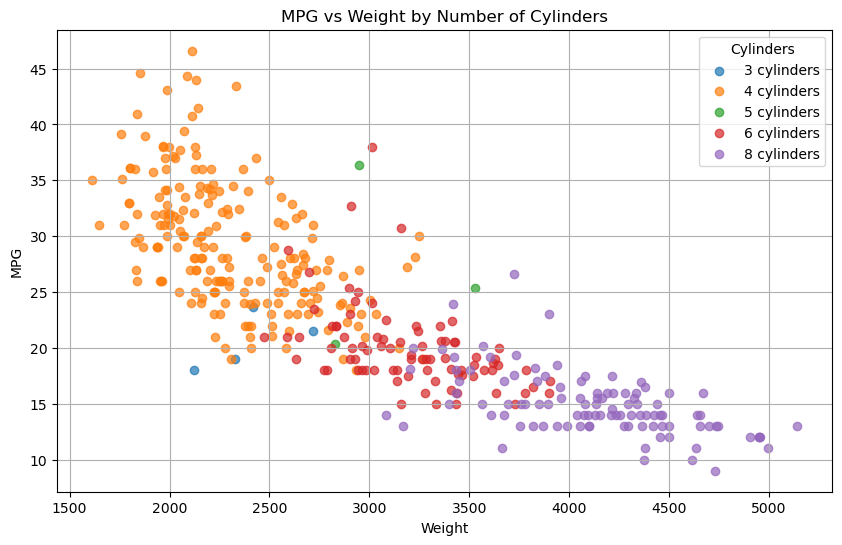

<Figure size 1200x600 with 0 Axes>

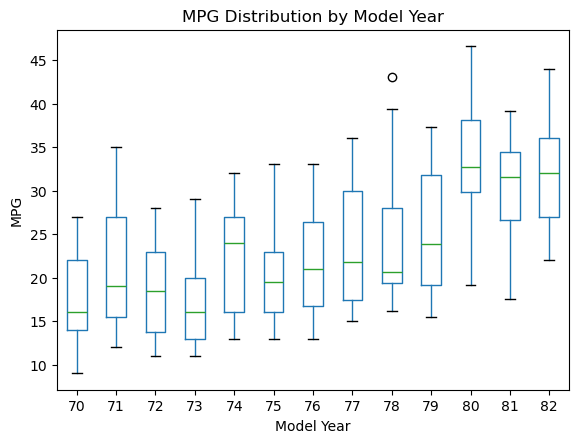

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비 (df2는 앞 미션에서 전처리 완료된 DataFrame)
# 아래는 예시로 다시 한번 불러오는 코드 (필요시 생략 가능)
file_path = r'C:\Users\TAEKWONLEE\Downloads\auto-mpg.csv'
df = pd.read_csv(file_path)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
median_hp = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(median_hp)
df2 = df.drop('car name', axis=1).copy()

# (1) MPG vs Weight 산점도 (cylinders별)
cylinder_values = sorted(df2['cylinders'].unique())
plt.figure(figsize=(10,6))
for cyl in cylinder_values:
    subset = df2[df2['cylinders'] == cyl]
    plt.scatter(subset['weight'], subset['mpg'], label=f'{cyl} cylinders', alpha=0.7)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('MPG vs Weight by Number of Cylinders')
plt.legend(title='Cylinders')
plt.grid(True)
plt.show()

# (2) model_year별 연비 박스플롯
plt.figure(figsize=(12, 6))
df2.boxplot(column='mpg', by='model year', grid=False)
plt.title('MPG Distribution by Model Year')
plt.suptitle('')
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.show()

상관계수 매트릭스:
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.773453 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.841284  0.896017   
displacement -0.804203   0.950721      1.000000    0.895778  0.932824   
horsepower   -0.773453   0.841284      0.895778    1.000000  0.862442   
weight       -0.831741   0.896017      0.932824    0.862442  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.686590 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.413733 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.452096 -0.581024   

              acceleration  model year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.505419   -0.348746 -0.562543  
displacement     -0.543684   -0.370164 -0.609409  
horsepower       -0.686590   -0.413733 -0.452096  
weight           -0.417457   -0.306564 -0.581024  
acceleration      1.00000

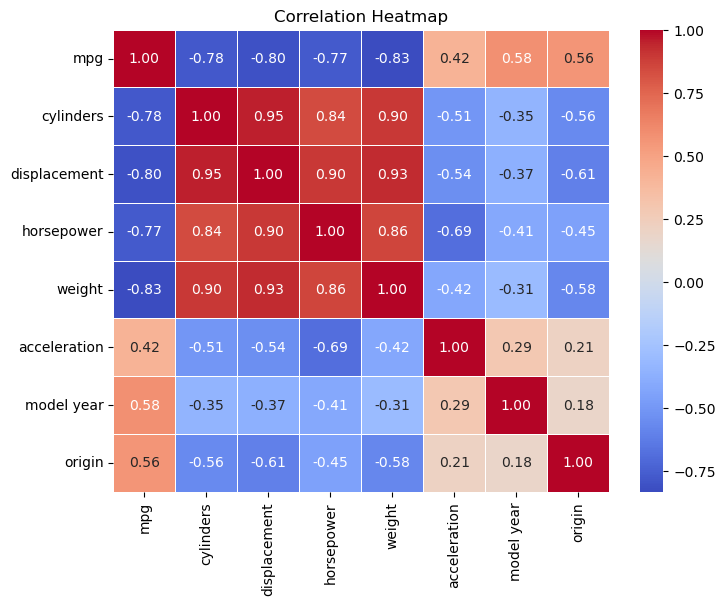


가장 강한 상관관계(절댓값 기준): ('cylinders', 'displacement'), 상관계수: 0.95


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# (전처리된 df2 사용)
# file_path = r'C:\Users\TAEKWONLEE\Downloads\auto-mpg.csv'
# df = pd.read_csv(file_path)
# df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
# median_hp = df['horsepower'].median()
# df['horsepower'] = df['horsepower'].fillna(median_hp)
# df2 = df.drop('car name', axis=1).copy()

# 1. 상관계수 매트릭스
corr_matrix = df2.corr(numeric_only=True)
print("상관계수 매트릭스:")
print(corr_matrix)

# 2. 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 3. 가장 강한 상관관계(절댓값 기준) 변수 찾기
corr_matrix_abs = corr_matrix.abs()
np.fill_diagonal(corr_matrix_abs.values, 0)
max_corr = corr_matrix_abs.max().max()
var1, var2 = np.where(corr_matrix_abs == max_corr)
var_names = corr_matrix_abs.columns
strongest_pair = (var_names[var1[0]], var_names[var2[0]])

print(f"\n가장 강한 상관관계(절댓값 기준): {strongest_pair}, 상관계수: {max_corr:.2f}")